Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
Date                          1319 non-null object
TempHighF                     1319 non-null int64
TempAvgF                      1319 non-null int64
TempLowF                      1319 non-null int64
DewPointHighF                 1319 non-null object
DewPointAvgF                  1319 non-null object
DewPointLowF                  1319 non-null object
HumidityHighPercent           1319 non-null object
HumidityAvgPercent            1319 non-null object
HumidityLowPercent            1319 non-null object
SeaLevelPressureHighInches    1319 non-null object
SeaLevelPressureAvgInches     1319 non-null object
SeaLevelPressureLowInches     1319 non-null object
VisibilityHighMiles           1319 non-null object
VisibilityAvgMiles            1319 non-null object
VisibilityLowMiles            1319 non-null object
WindHighMPH                   1319 non-null object
WindAvgMPH                   

In [30]:
df['DewPointAvgF'].unique()  #tu kan ada -

array(['49', '36', '27', '28', '40', '39', '41', '26', '42', '22', '48',
       '32', '8', '11', '45', '55', '61', '37', '47', '25', '23', '20',
       '33', '30', '29', '17', '14', '13', '54', '59', '15', '24', '34',
       '35', '57', '50', '53', '60', '46', '56', '51', '31', '38', '62',
       '43', '63', '64', '67', '66', '58', '70', '68', '65', '69', '71',
       '72', '-', '73', '74', '21', '44', '52', '12', '75', '76', '18'],
      dtype=object)

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

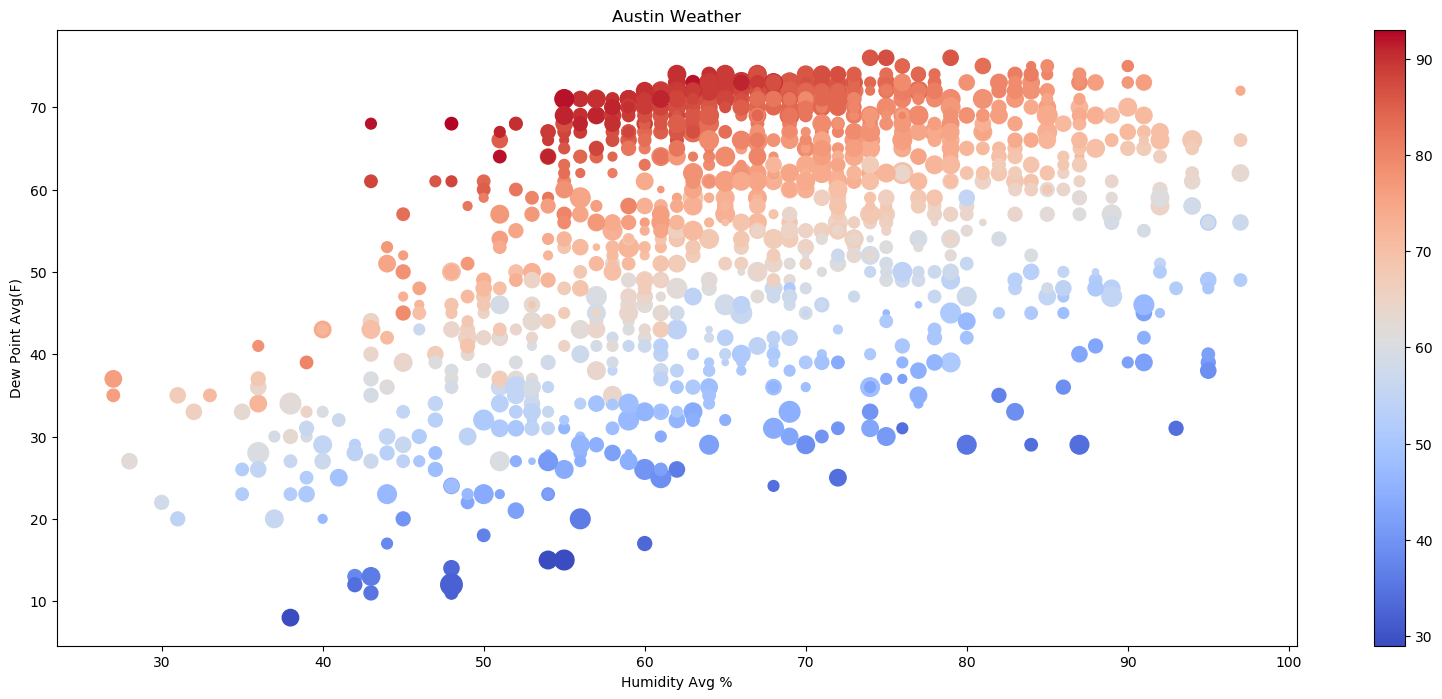

In [32]:
# code here
# code here
df['DewPointAvgF'].replace('-',np.nan,inplace=True)
df['HumidityAvgPercent'].replace('-',np.nan,inplace=True)
df['WindAvgMPH'].replace('-',np.nan,inplace=True)

df.fillna(method='ffill',inplace=True)

dff=df[['DewPointAvgF','HumidityAvgPercent','WindAvgMPH','TempAvgF']].astype('float64')

fig,ax=plt.subplots(figsize=(20,8))
plt.style.use('default')
axmap=ax.scatter(dff['HumidityAvgPercent'],dff['DewPointAvgF'], sizes=20*dff['WindAvgMPH'], c=dff['TempAvgF'], cmap='coolwarm')
ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg(F)')
ax.set_title('Austin Weather')
fig.colorbar(axmap)
plt.show()

---

---

Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2>Soal 2: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [34]:
#code here
dfg=df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean()
dfg

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

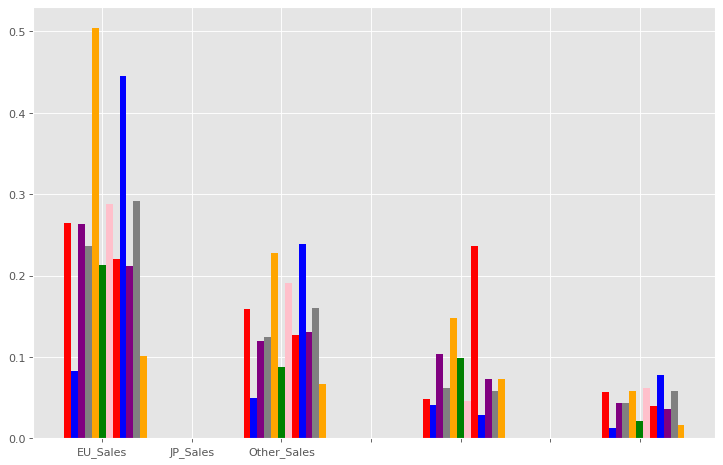

In [36]:
#code here
import numpy as np

width=1/13
y1=dfg.loc['Action']
y2=dfg.loc['Adventure']
y3=dfg.loc['Fighting']
y4=dfg.loc['Misc']
y5=dfg.loc['Platform']
y6=dfg.loc['Puzzle']
y7=dfg.loc['Racing']
y8=dfg.loc['Role-Playing']
y9=dfg.loc['Shooter']
y10=dfg.loc['Simulation']
y11=dfg.loc['Sports']
y12=dfg.loc['Strategy']
x=np.arange(0,8,2)

fig,ax=plt.subplots(figsize=(11,7),dpi=80)
plt.style.use('ggplot')
rects1=ax.bar(x-width*5,y1,width,label='Action',color='r')
rects2=ax.bar(x-width*4,y2,width,label='Adventure',color='b')
rects3=ax.bar(x-width*3,y3,width,label='Fighting',color='purple')
rects4=ax.bar(x-width*2,y4,width,label='Misc',color='grey')
rects5=ax.bar(x-width*1,y5,width,label='Platform',color='orange')
rects6=ax.bar(x+width*0,y6,width,label='Puzzle',color='g')
rects7=ax.bar(x+width*1,y7,width,label='Racing',color='pink')
rects8=ax.bar(x+width*2,y8,width,label='Role-Playing',color='r')
rects9=ax.bar(x+width*3,y9,width,label='Shooter',color='b')
rects10=ax.bar(x+width*4,y10,width,label='Simulation',color='purple')
rects11=ax.bar(x+width*5,y11,width,label='Sports',color='grey')
rects12=ax.bar(x+width*6,y12,width,label='Strategy',color='orange')

ax.set_xticklabels(dfg.columns)

plt.show()

NA_Sales       0.100881
EU_Sales       0.066579
JP_Sales       0.072628
Other_Sales    0.016681
Name: Strategy, dtype: float64

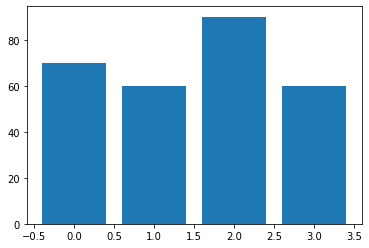

In [25]:
fig,ax=plt.subplots()
x=np.arange(4)
y12=[70,60,90,60]
ax.bar(x,y12)
dfg.loc['Strategy']

In [38]:
for row in dfg.iterrows():
    print(row[0])
    print('========================')

Action
Adventure
Fighting
Misc
Platform
Puzzle
Racing
Role-Playing
Shooter
Simulation
Sports
Strategy


In [39]:
for row in dfg.iterrows():
    print(row[1])
    print('========================')

NA_Sales       0.264726
EU_Sales       0.158323
JP_Sales       0.048236
Other_Sales    0.056508
Name: Action, dtype: float64
NA_Sales       0.082271
EU_Sales       0.049868
JP_Sales       0.040490
Other_Sales    0.013072
Name: Adventure, dtype: float64
NA_Sales       0.263667
EU_Sales       0.119481
JP_Sales       0.103007
Other_Sales    0.043255
Name: Fighting, dtype: float64
NA_Sales       0.235906
EU_Sales       0.124198
JP_Sales       0.061967
Other_Sales    0.043312
Name: Misc, dtype: float64
NA_Sales       0.504571
EU_Sales       0.227573
JP_Sales       0.147596
Other_Sales    0.058228
Name: Platform, dtype: float64
NA_Sales       0.212680
EU_Sales       0.087251
JP_Sales       0.098471
Other_Sales    0.021564
Name: Puzzle, dtype: float64
NA_Sales       0.287766
EU_Sales       0.190865
JP_Sales       0.045388
Other_Sales    0.061865
Name: Racing, dtype: float64
NA_Sales       0.219946
EU_Sales       0.126384
JP_Sales       0.236767
Other_Sales    0.040060
Name: Role-Playing, dtyp

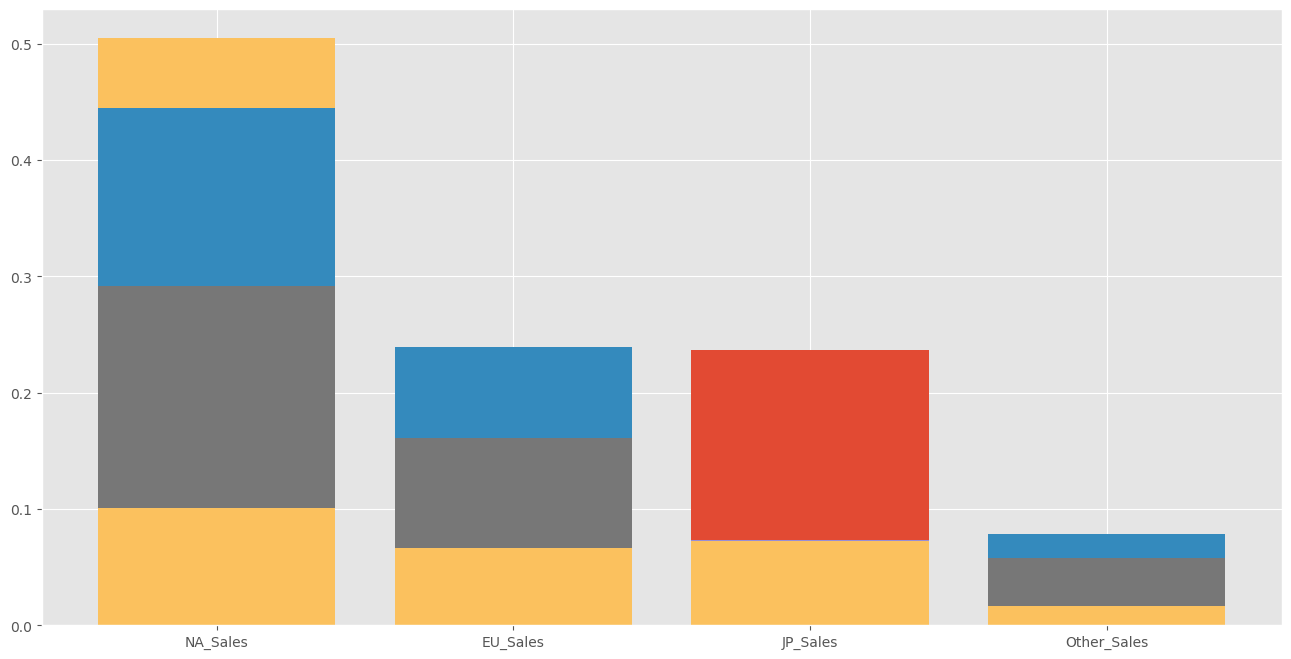

In [41]:
fig,ax=plt.subplots(figsize=(16,8))
plt.style.use('ggplot')

for row in dfg.iterrows():
    ax.bar(dfg.columns,row[1],label=row[0] )
    


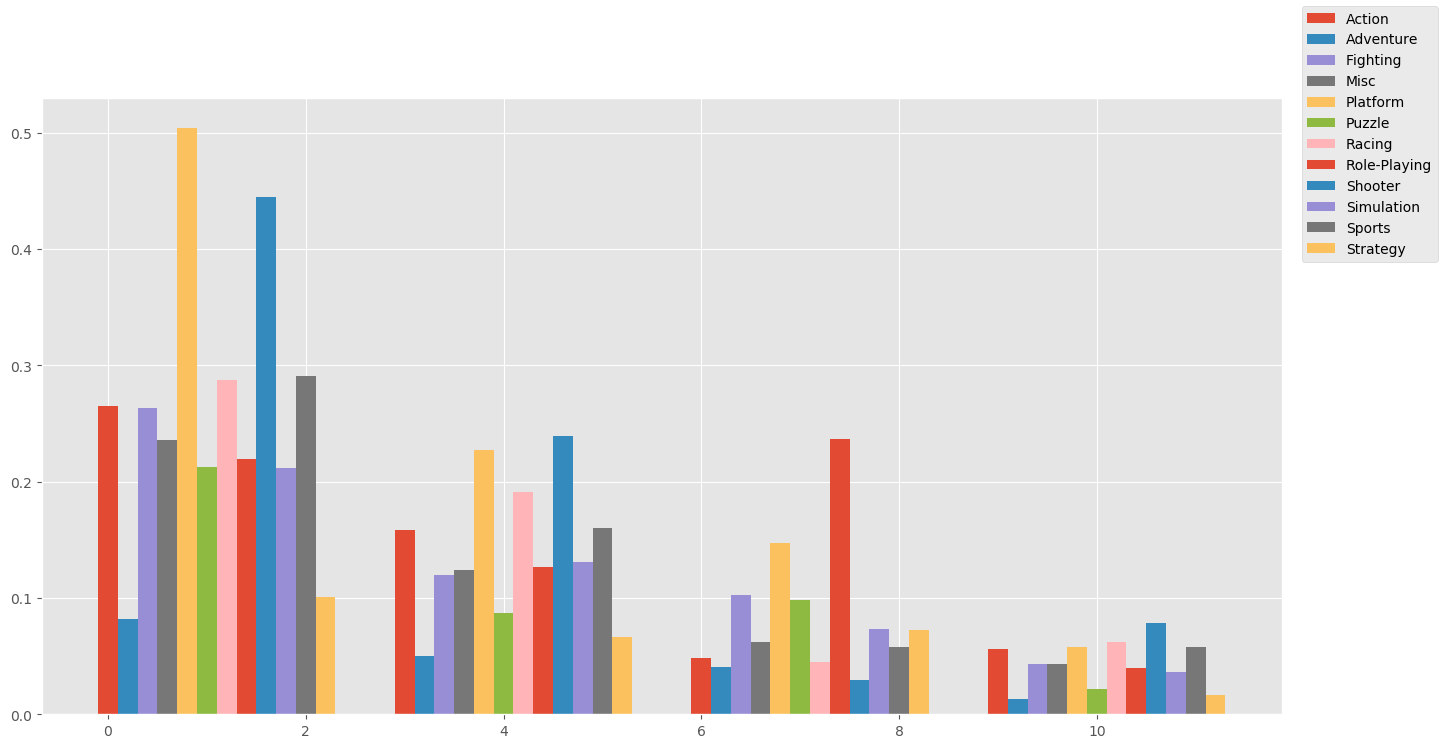

In [44]:
fig,ax=plt.subplots(figsize=(16,8))
plt.style.use('ggplot')
x=np.arange(0,12,3)
x0=0

for row in dfg.iterrows():
    ax.bar(x+x0,row[1],label=row[0],width=0.2)
    x0+=0.2
fig.legend()


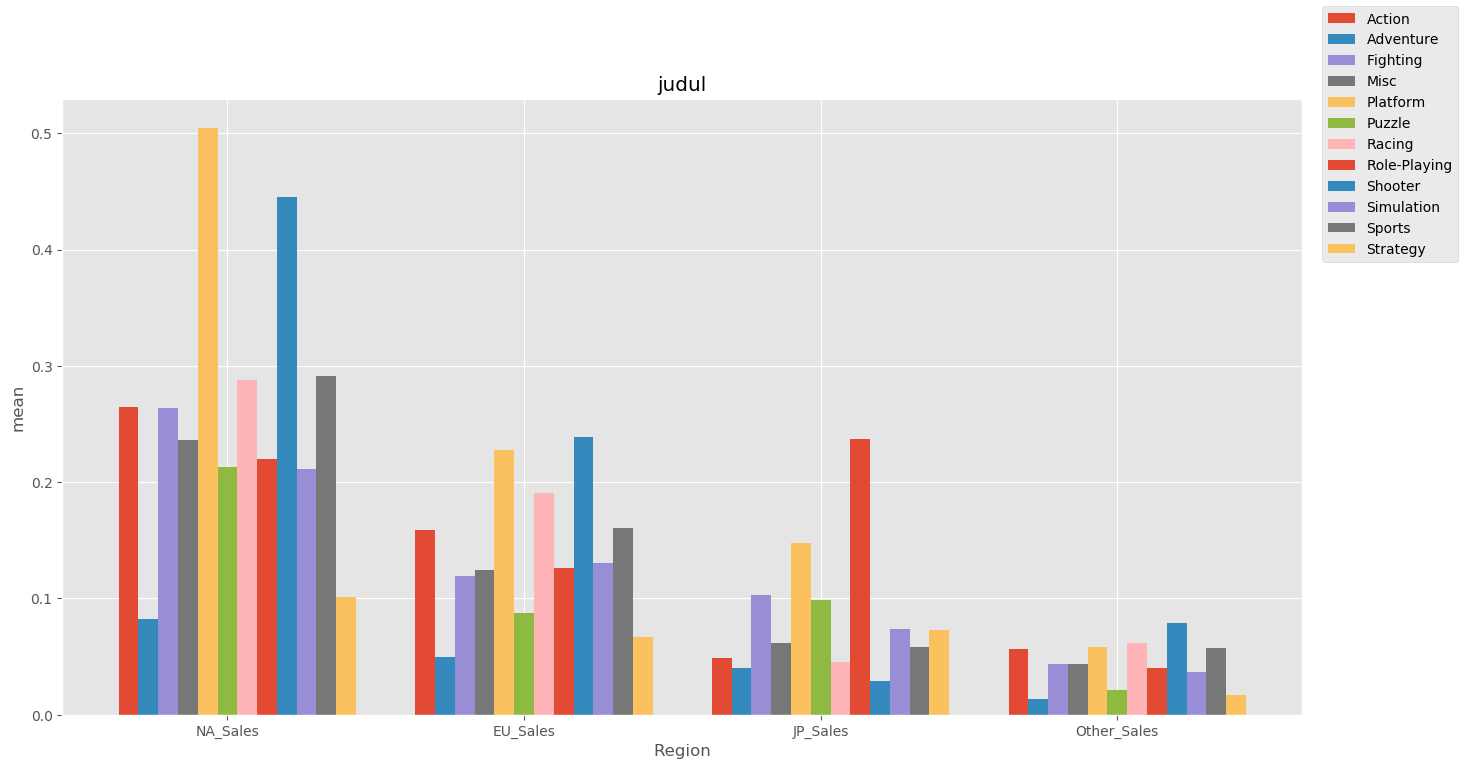

In [48]:
fig,ax=plt.subplots(figsize=(16,8))
plt.style.use('ggplot')
x=np.arange(0,12,3)
#kan 0.2 x 12 =2.4 maka ambil aja 3, dan 3 x 4 =12
x0=0

for row in dfg.iterrows():
    ax.bar(x+x0,row[1],label=row[0],width=0.2)
    x0+=0.2
fig.legend()
ax.set_xlabel('Region')
ax.set_ylabel('mean')
ax.set_title('judul')
ax.set_xticks(x+1)
ax.set_xticklabels(dfg.columns)
plt.show()

Jawab: si oren sering tinggi

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

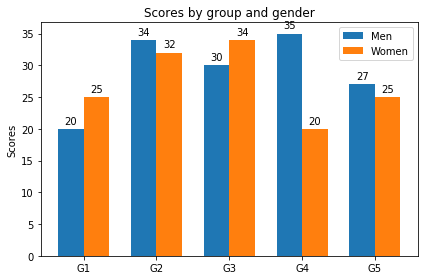

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

IndexError: list assignment index out of range

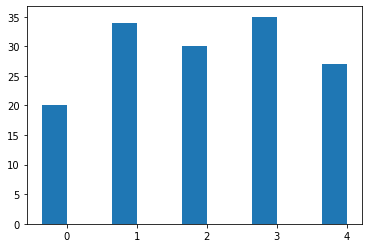

In [6]:
fig, ax = plt.subplots()
rects=[]
rects[1]= ax.bar(x - width/2, men_means, width, label='Men')
rects[2] = ax.bar(x + width/2, women_means, width, label='Women')

In [3]:
rects

NameError: name 'rects' is not defined

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

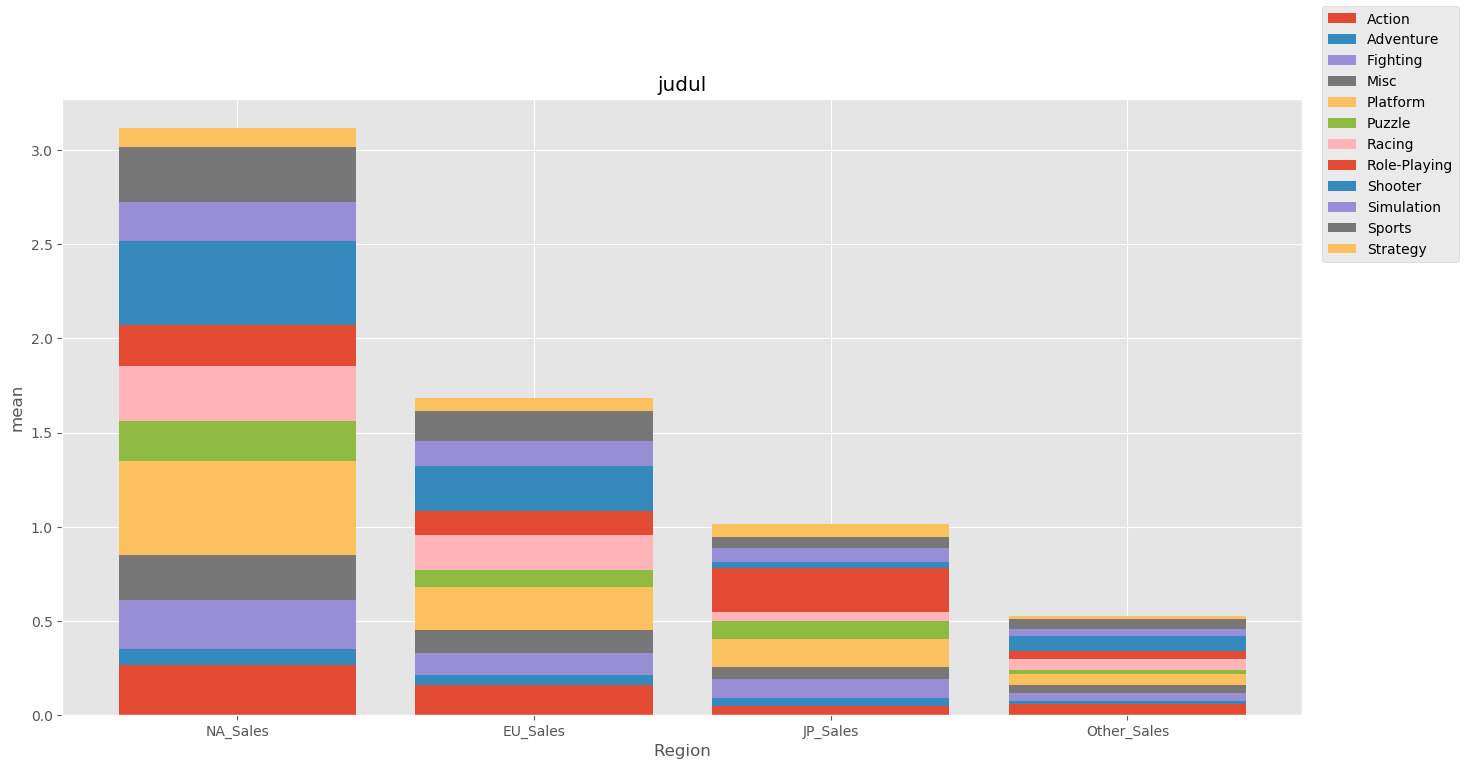

In [53]:
#code here
fig,ax=plt.subplots(figsize=(16,8))
plt.style.use('ggplot')
x=np.arange(4)
bottom=0

for row in dfg.iterrows():
    ax.bar(x,row[1],label=row[0],bottom=bottom)
    bottom+=row[1]
fig.legend()
ax.set_xlabel('Region')
ax.set_ylabel('mean')
ax.set_title('judul')
ax.set_xticks(x)
ax.set_xticklabels(dfg.columns)
plt.show()

Jawab:total NA_sales paling besar

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)